In [1]:
import os,shutil
base_dir = 'C:\\Users\\krishan\\GPU-projects\\DogsVsCats'

In [2]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [17]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=40,
                             rescale=1./255,
                            height_shift_range=0.2,
                            width_shift_range=0.2,
                            horizontal_flip=True,
                            shear_range = 0.2,
                            zoom_range=0.2,
                            fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary'
                                                   )            
val_generator = train_datagen.flow_from_directory(val_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary'
                                                   )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [20]:
from keras import losses
model.compile(optimizer=optimizers.adam(lr=1e-4),
             loss='binary_crossentropy',
             metrics = ['acc'])

In [21]:
history = model.fit_generator(train_generator,
                   steps_per_epoch=100,
                   epochs = 100,
                   validation_data=val_generator,
                   validation_steps = 50,
                   )

Epoch 1/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6931 - acc: 0.5244 - val_loss: 0.6948 - val_acc: 0.4930
Epoch 2/100
100/100 [==============================] - 27s 272ms/step - loss: 0.6816 - acc: 0.5519 - val_loss: 0.6615 - val_acc: 0.5990
Epoch 3/100
100/100 [==============================] - 27s 272ms/step - loss: 0.6718 - acc: 0.5744 - val_loss: 0.6516 - val_acc: 0.6030
Epoch 4/100
100/100 [==============================] - 27s 271ms/step - loss: 0.6485 - acc: 0.6184 - val_loss: 0.6330 - val_acc: 0.6250
Epoch 5/100
100/100 [==============================] - 27s 271ms/step - loss: 0.6128 - acc: 0.6578 - val_loss: 0.6034 - val_acc: 0.6710
Epoch 6/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6091 - acc: 0.6616 - val_loss: 0.6088 - val_acc: 0.6580
Epoch 7/100
100/100 [==============================] - 27s 272ms/step - loss: 0.5950 - acc: 0.6778 - val_loss: 0.5876 - val_acc: 0.6780
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 27s 271ms/step - loss: 0.3572 - acc: 0.8381 - val_loss: 0.4404 - val_acc: 0.7850
Epoch 62/100
100/100 [==============================] - 28s 277ms/step - loss: 0.3476 - acc: 0.8491 - val_loss: 0.4385 - val_acc: 0.8040
Epoch 63/100
100/100 [==============================] - 27s 271ms/step - loss: 0.3602 - acc: 0.8350 - val_loss: 0.4446 - val_acc: 0.8010
Epoch 64/100
100/100 [==============================] - 27s 271ms/step - loss: 0.3484 - acc: 0.8444 - val_loss: 0.4386 - val_acc: 0.8030
Epoch 65/100
100/100 [==============================] - 27s 273ms/step - loss: 0.3449 - acc: 0.8447 - val_loss: 0.4347 - val_acc: 0.8000
Epoch 66/100
100/100 [==============================] - 27s 270ms/step - loss: 0.3700 - acc: 0.8328 - val_loss: 0.4793 - val_acc: 0.7680
Epoch 67/100
100/100 [==============================] - 27s 272ms/step - loss: 0.3306 - acc: 0.8541 - val_loss: 0.4254 - val_acc: 0.8080
Epoch 68/100
100/100 [===================

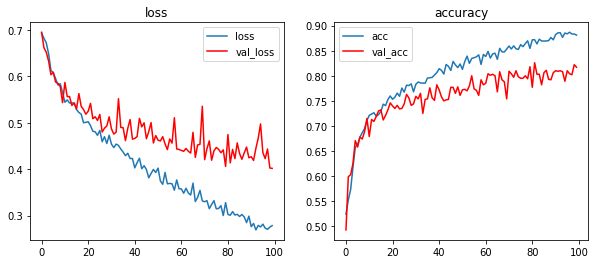

In [22]:
import matplotlib.pyplot as pp
def plothistory(history):
    pp.figure(figsize=(10,4))
    pp.subplot(1,2,1)
    pp.plot(history['loss'])
    pp.plot(history['val_loss'],'r')
    pp.legend(['loss','val_loss'])
    pp.title('loss')
    pp.subplot(1,2,2)
    pp.plot(history['acc'])
    pp.plot(history['val_acc'],'r')
    pp.legend(['acc','val_acc'])
    pp.title('accuracy')
    pp.show()
plothistory(history.history)

In [23]:
model.save('cat_anddog_small_2.h5')